# Figure 2
# Figure 3a


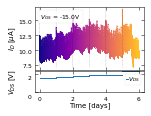

# Figure 3b


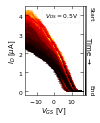

# Figure 3c


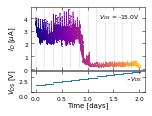

# Figure 3d


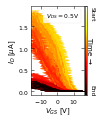

# Figure 4a


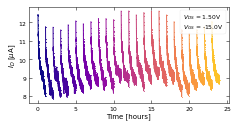

# Figure 4b


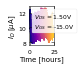

# Figure 4c


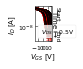

# Figure 5a


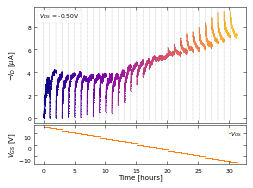

In [1]:
import os
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')

from utilities import DataLoggerUtility as dlu
from utilities import DataPlotterUtility as dpu
import B2912A_Main_User_Interface_Script as mainUI

from matplotlib import pyplot as plt
import numpy as np

# %config InlineBackend.figure_format = 'svg'

# plt.style.use('seaborn-paper')

# plt.rcParams['mathtext.fontset'] = 'custom'
# plt.rcParams['mathtext.rm'] = 'Arial'
# plt.rcParams['mathtext.it'] = 'Arial'
# plt.rcParams['mathtext.bf'] = 'Arial:bold'

# plt.rcParams["font.family"] = 'Times New Roman'
# plt.rcParams['mathtext.rm'] = 'Times New Roman'
# plt.rcParams['mathtext.it'] = 'Times New Roman'
# plt.rcParams['mathtext.bf'] = 'Times New Roman'

# plt.rcParams['axes.labelsize'] = 12
# plt.rcParams['axes.titlesize'] = 12
# plt.rcParams['legend.fontsize'] = 8
# plt.rcParams['xtick.labelsize'] = 8
# plt.rcParams['ytick.labelsize'] = 8
# plt.rcParams['font.size'] = 8
# plt.rcParams['axes.labelpad'] = 0

# # plt.rcParams['axes.labelsize'] = 10*2
# # plt.rcParams['axes.titlesize'] = 10*2
# # plt.rcParams['legend.fontsize'] = 6*2
# # plt.rcParams['xtick.labelsize'] = 6*2
# # plt.rcParams['ytick.labelsize'] = 6*2
# # plt.rcParams['font.size'] = 6*2

# plt.rcParams['xtick.major.size'] = 6
# plt.rcParams['ytick.major.size'] = 6
# plt.rcParams['figure.figsize'] = [8,6]
# # plt.rcParams['figure.figsize'] = [2.8,3.2]
# plt.rcParams['figure.titlesize'] = 8
# plt.rcParams['axes.formatter.use_mathtext'] = True
# plt.rcParams['axes.formatter.useoffset'] = False
# plt.rcParams['xtick.top'] = True
# plt.rcParams['ytick.right'] = True
# plt.rcParams['xtick.direction'] = 'in'
# plt.rcParams['ytick.direction'] = 'in'
# plt.rcParams['axes.axisbelow'] = False
# # plt.rcParams['figure.autolayout'] = True
# plt.rcParams['axes.linewidth'] = 1
# plt.rcParams['xtick.major.width'] = 1
# plt.rcParams['ytick.major.width'] = 1
# plt.rcParams['axes.formatter.limits'] = [-2, 3]


def makePlots(waferID, chipID, deviceID, startExperimentNumber, endExperimentNumber, 
              specificPlot='', figureSize=None, saveFolder=None, saveNamePrefix = '', save=False):
    parameters = mainUI.default_parameters
    
    dpu.publication_mode = True
    
    parameters['runType'] = 'DeviceHistory'
    parameters['waferID'] = waferID
    parameters['chipID'] = chipID
    parameters['deviceID'] = deviceID
    parameters['DeviceHistory']['excludeDataBeforeJSONExperimentNumber'] = startExperimentNumber
    parameters['DeviceHistory']['excludeDataAfterJSONExperimentNumber'] = endExperimentNumber
    parameters['DeviceHistory']['postFiguresGenerated'] = False
    parameters['DeviceHistory']['saveFiguresGenerated'] = save
    parameters['DeviceHistory']['gateSweepDirection'] = 'reverse'
    parameters['DeviceHistory']['plotInRealTime'] = False
    parameters['DeviceHistory']['specificPlotToCreate'] = specificPlot
    parameters['DeviceHistory']['figureSizeOverride'] = figureSize
    if saveFolder is not None:
        parameters['plotsFolder'] = saveFolder + '/'
    
    parameters['plotsFolder'] += saveNamePrefix
    
    mainUI.runAction(parameters, None, None)


saveFolder = '../../../Publications/2018-04-30 Bias Stress ACS/Plots'
print('# Figure 2')
# makePlots('C127', 'X', '15-16', 4, 4, 'FullStaticBiasHistory', (3.3,2.2), saveFolder, 'Figure 2 - ', True) # Static Bias
print('# Figure 3a')
makePlots('C127', 'E', '15-16', 2, 11, 'FullStaticBiasHistory', (2,1.6), saveFolder, 'Figure 3a - ', True) # On/Off Current
print('# Figure 3b')
makePlots('C127', 'E', '15-16', 2, 11, 'FullTransferCurveHistory', (1.4,1.7), saveFolder, 'Figure 3b - ', True) # Transfer Curve
print('# Figure 3c')
makePlots('C127', 'P', '1-2', 8, 8, 'FullStaticBiasHistory', (2.1,1.6), saveFolder, 'Figure 3c - ', True) # Static Bias
print('# Figure 3d')
makePlots('C127', 'P', '1-2', 8, 8, 'FullTransferCurveHistory', (1.4,1.7), saveFolder, 'Figure 3d - ', True) # Transfer Curve
print('# Figure 4a')
makePlots('C127', 'E', '15-16', 6, 6, 'FullStaticBiasHistory', (3.3,1.75), saveFolder, 'Figure 4a - ', True) # Static Bias
print('# Figure 4b')
makePlots('C127', 'E', '15-16', 6, 6, 'FullStaticBiasHistory', (0.85,0.95), saveFolder, 'Figure 4b - ', True) # Static Bias
print('# Figure 4c')
makePlots('C127', 'E', '15-16', 6, 6, 'FullSubthresholdCurveHistory', (0.85,0.95), saveFolder, 'Figure 4c - ', True) # Subthreshold Curve
print('# Figure 5a')
makePlots('C127', 'X', '15-16', 24, 24, 'FullStaticBiasHistory', (3.5,2.6), saveFolder, 'Figure 5a - ', True) # Static Bias

In [1]:
parametersSets = dlu.loadJSON('data/C127/X/15-16/', 'StaticBias.json')
parametersSets = dlu.filterHistoryGreaterThan(parametersSets, 'experimentNumber', 24)
parametersSets = dlu.filterHistoryLessThan(parametersSets, 'experimentNumber', 24)

initialTime = parametersSets[0]['Results']['timestamps'][0]

fig = plt.figure(figsize=(3,4))

for parameters in parametersSets:
    timestamps = np.array(parameters['Results']['timestamps'])
    timestamps = timestamps - timestamps[0]
    timestamps = timestamps/3600
    Id = np.array(parameters['Results']['id_data'])
    
    plt.semilogy(timestamps, abs(Id))

plt.xlabel('Time After Gate Sweep [hr]')
plt.ylabel('$I_D$')
plt.show()

for parameters in parametersSets:
    timestamps = np.array(parameters['Results']['timestamps'])
    timestamps = timestamps - timestamps[0]
    timestamps = timestamps/3600
    Id = np.array(parameters['Results']['id_data'])
    
    plt.plot(timestamps, abs(Id))

plt.xlabel('Time [Hours]')
plt.ylabel('$I_D$')
plt.show()

NameError: name 'dlu' is not defined

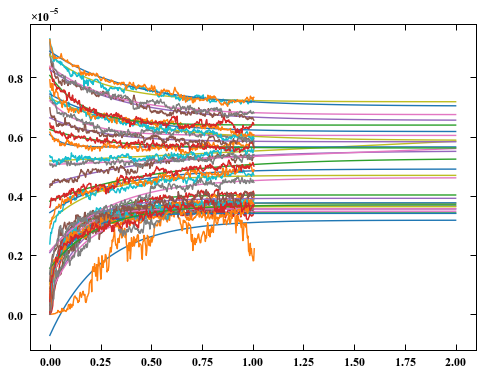

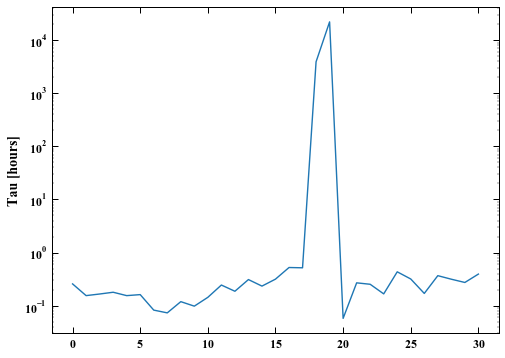

0.244146722649


In [15]:
from scipy.optimize import curve_fit

def trapFill1(t, v, A, tau):
    return v + A*np.exp(-t/tau)

popts = []

for parameters in parametersSets:
    timestamps = np.array(parameters['Results']['timestamps'])
    timestamps = timestamps - timestamps[0]
    timestamps = timestamps/3600
    Id = np.array(parameters['Results']['id_data'])
    
    popt, pcov = curve_fit(trapFill1, timestamps, abs(Id))
    
    popts.append(popt)
    
    timestamps2 = np.linspace(0,2,100)
    plt.plot(timestamps2, trapFill1(timestamps2, *popt))
    plt.plot(timestamps, abs(Id))

plt.show()

taus = [popt[2] for popt in popts]
plt.semilogy(taus)
plt.ylabel('Tau [hours]')
plt.show()

print(np.median(taus))

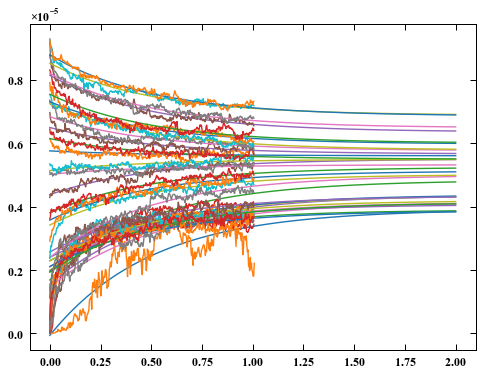

In [16]:
from scipy.optimize import curve_fit

def trapFill2(t, v, A):
    tau = 0.244146722649
    tau = 0.5
    return v + A*np.exp(-t/tau)

for parameters in parametersSets:
    timestamps = np.array(parameters['Results']['timestamps'])
    timestamps = timestamps - timestamps[0]
    timestamps = timestamps/3600
    Id = np.array(parameters['Results']['id_data'])
    
    popt, pcov = curve_fit(trapFill2, timestamps, abs(Id))
    
    timestamps2 = np.linspace(0,2,100)
    plt.plot(timestamps2, trapFill2(timestamps2, *popt))
    plt.plot(timestamps, abs(Id))

plt.show()

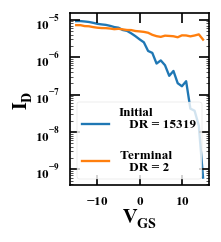

In [42]:
IdsInitial = []
IdsFinal = []
Vgss = []

for parameters in parametersSets:
    Id = np.array(parameters['Results']['id_data'])
    Vgs = np.array(parameters['Results']['vgs_data'])
    IdsInitial.append(np.mean(Id[0:2]))
    IdsFinal.append(np.mean(Id[-60:-1]))
    Vgss.append(Vgs[0])

fig = plt.figure(figsize=(1.5,1.9))
plt.semilogy(Vgss, np.abs(IdsInitial), label='Initial\n   DR = {:.0f}\n'.format(IdsInitial[-1]/IdsInitial[0]))
plt.semilogy(Vgss, np.abs(IdsFinal), label='Terminal\n   DR = {:.0f}'.format(IdsFinal[-1]/IdsFinal[0]))
plt.legend()
plt.xlabel('$V_{GS}$')
plt.ylabel('$I_D$')
plt.show()